# HW2
## Machine Learning
#### Chandler Smith

Summary: The purpose of this assignment is to conduct exploratory data analysis on a merged dataset. EDA should allow us to uncover information about the data such as trends, relationships, and patterns. It also can be used to identify parts of data that needs to be cleaned. By the end, we gain the necessary experience to handle, analyze, and visualize real world 'style' data which can be messy. 

Cite: Numpy documentation, sklean docs, pandas, and W3Schools. GPT for debugging, Toppr, Machine Learning Mastery.com


In [216]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets as sd
import seaborn as sns
import glob
import os

Question 1: Import and merge all files into a single data file. Show the data type of all columns along with the shape of the merged dataframe. Now merge the continents csv file with the above merged file. Call it gm_df. 

In [217]:
# I had lots of trouble iterating over the import so just did the first part sequentially
# import all the files
df_inflation = pd.read_csv('ddf--datapoints--inflation_annual_percent--by--geo--time.csv')
df_phones = pd.read_csv('ddf--datapoints--cell_phones_per_100_people--by--geo--time.csv')
df_gapminder = pd.read_csv('ddf--datapoints--gapminder_gini--by--geo--time.csv')
df_incomePP = pd.read_csv('ddf--datapoints--income_per_person_with_projections--by--geo--time.csv')
df_emissions = pd.read_csv('ddf--datapoints--co2_emissions_tonnes_per_person--by--geo--time.csv')
df_GDP_per = pd.read_csv('ddf--datapoints--gdp_per_capita_yearly_growth--by--geo--time.csv')
df_life_expectancy = pd.read_csv('ddf--datapoints--life_expectancy_years--by--geo--time.csv')
df_unemployed = pd.read_csv('ddf--datapoints--aged_15plus_unemployment_rate_percent--by--geo--time.csv')
df_sex_by_age = pd.read_csv('ddf--datapoints--sex_ratio_all_age_groups--by--geo--time.csv')
df_population = pd.read_csv('ddf--datapoints--population_total--by--geo--time.csv')
df_geo_continents = pd.read_csv('letter codes and continents .csv')

finallist = [df_emissions, df_gapminder, df_incomePP, df_inflation, 
             df_phones, df_GDP_per, df_life_expectancy, df_unemployed,
              df_sex_by_age, df_population ]

final = finallist[0]

for i in range(1,len(finallist)):
    final = pd.merge(final, finallist[i], on=['geo', 'time'], how = 'outer')

print(final.dtypes)
print(final.shape)

df_geo_continents.rename(columns={'ISO (3)':'geo'}, inplace=True)
df_geo_continents['geo'] = df_geo_continents['geo'].str.lower()
#print(df_geo_continents.head)
gm_df = pd.merge(final, df_geo_continents, on='geo', how='outer')
print(gm_df.head)


geo                                       object
time                                       int64
co2_emissions_tonnes_per_person          float64
gapminder_gini                           float64
income_per_person_with_projections       float64
inflation_annual_percent                 float64
cell_phones_per_100_people               float64
gdp_per_capita_yearly_growth             float64
life_expectancy_years                    float64
aged_15plus_unemployment_rate_percent    float64
sex_ratio_all_age_groups                 float64
population_total                         float64
dtype: object
(69616, 12)
<bound method NDFrame.head of        geo    time  co2_emissions_tonnes_per_person  gapminder_gini  \
0      afg  1949.0                          0.00192            34.1   
1      afg  1950.0                          0.01088            34.0   
2      afg  1951.0                          0.01169            34.0   
3      afg  1952.0                          0.01155            34.0   
4


Question 2: Create a subset of the above table by filtering data for years 2010 through 2020. 


In [218]:
# create subset from 2010-20 inclusive
gm_df_10s = gm_df.loc[(gm_df['time'] >= 2010) & (gm_df['time'] <= 2020)]
# create a csv to check
gm_df_10s.to_csv('gm_df 2010-2020.csv', index=False)

Question 3: Analyze missing values and create new columns by imputing using at least two different methods. 


In [219]:
# create two new columns using two different methods
# Cite: https://www.geeksforgeeks.org/create-a-new-column-in-pandas-dataframe-based-on-the-existing-columns/
# median income column
gm_df_10s['medianIncome'] = gm_df_10s['income_per_person_with_projections'].fillna(gm_df_10s['income_per_person_with_projections'].median)
# mean imputation - replace with most common
gm_df_10s['lifeMode'] = gm_df_10s['life_expectancy_years'].fillna(gm_df_10s['life_expectancy_years'].mode)

# address the rest missing values by plugging in the mean
#for col in gm_df_10s:
 #   if isinstance(gm_df_10s[col].iloc[0], (int, float)):
 #       gm_df_10s[col].fillna(gm_df_10s[col].mean, inplace=True)

/var/folders/yg/bn_3bwjn31g333w7lwtmxt7r0000gn/T/ipykernel_49046/2185973677.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gm_df_10s['medianIncome'] = gm_df_10s['income_per_person_with_projections'].fillna(gm_df_10s['income_per_person_with_projections'].median)
/var/folders/yg/bn_3bwjn31g333w7lwtmxt7r0000gn/T/ipykernel_49046/2185973677.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gm_df_10s['lifeMode'] = gm_df_10s['life_expectancy_years'].fillna(gm_df_10s['life_expectancy_years'].mode)


Question 4: Create new features (columns) in the following way:

a.	Categorical columns the size of nations: Small (< 1 million), Medium (1 million to 10 million), Large (10 -100 million), Very Large ( > 100 million) 

b.	Categorical columns the income per person of nations: Low(< $1,000), Medium ($1,000 - $10,000), High(>$10,000)¬


In [220]:
# Cite https://mungingdata.com/pandas/dataframe-cut-category/
#categorical population columns: S, M, L, VL
pop_categories = ["Small", "Medium", "Large", "Very Large"]
pop_buckets = [0, 1000000, 10000000, 100000000, np.inf]
gm_df_10s["Cat: Size of Nations"] = pd.cut(gm_df_10s['population_total'], bins=pop_buckets, labels=pop_categories)
#print(gm_df_10s['Cat: Size of Nations'])

#categorical income columns: Low, Med, High
inc_categories = ["Low", "Medium", "High"]
inc_buckets = [0, 1000, 10000, np.inf]
gm_df_10s["Cat: Income Per Person"] = pd.cut(gm_df_10s['income_per_person_with_projections'], bins=inc_buckets, labels=inc_categories)
#print(gm_df_10s['Cat: Income Per Person'])
print(gm_df_10s)


         geo    time  co2_emissions_tonnes_per_person  gapminder_gini  \
61       afg  2010.0                          0.28984            36.8   
62       afg  2011.0                          0.40628            36.8   
63       afg  2012.0                          0.34501            36.8   
64       afg  2013.0                          0.28027            36.8   
65       afg  2014.0                          0.25342            36.8   
...      ...     ...                              ...             ...   
69531  stbar  2016.0                              NaN             NaN   
69532  stbar  2017.0                              NaN             NaN   
69533  stbar  2018.0                              NaN             NaN   
69534  stbar  2019.0                              NaN             NaN   
69535  stbar  2020.0                              NaN             NaN   

       income_per_person_with_projections  inflation_annual_percent  \
61                                 1215.0           

/var/folders/yg/bn_3bwjn31g333w7lwtmxt7r0000gn/T/ipykernel_49046/2054333140.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gm_df_10s["Cat: Size of Nations"] = pd.cut(gm_df_10s['population_total'], bins=pop_buckets, labels=pop_categories)
/var/folders/yg/bn_3bwjn31g333w7lwtmxt7r0000gn/T/ipykernel_49046/2054333140.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gm_df_10s["Cat: Income Per Person"] = pd.cut(gm_df_10s['income_per_person_with_projections'], bins=inc_buckets, labels=inc_categories)


Question 5:	Perform descriptive analysis for all numerical columns. (.describe) Then create cross-tabulations for the newly created categorical columns for size and income per person by continents and regions. Visualize the categorical columns. 


<bound method NDFrame.describe of 61       2010.0
62       2011.0
63       2012.0
64       2013.0
65       2014.0
          ...  
69531    2016.0
69532    2017.0
69533    2018.0
69534    2019.0
69535    2020.0
Name: time, Length: 2610, dtype: float64>
<bound method NDFrame.describe of 61       0.28984
62       0.40628
63       0.34501
64       0.28027
65       0.25342
          ...   
69531        NaN
69532        NaN
69533        NaN
69534        NaN
69535        NaN
Name: co2_emissions_tonnes_per_person, Length: 2610, dtype: float64>
<bound method NDFrame.describe of 61       36.8
62       36.8
63       36.8
64       36.8
65       36.8
         ... 
69531     NaN
69532     NaN
69533     NaN
69534     NaN
69535     NaN
Name: gapminder_gini, Length: 2610, dtype: float64>
<bound method NDFrame.describe of 61       1215.0
62       1261.0
63       1350.0
64       1351.0
65       1374.0
          ...  
69531       NaN
69532       NaN
69533       NaN
69534       NaN
69535       NaN
Name: in

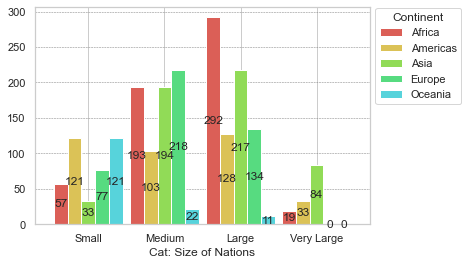

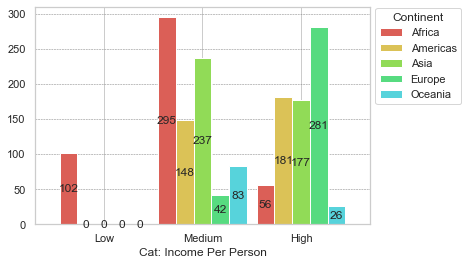

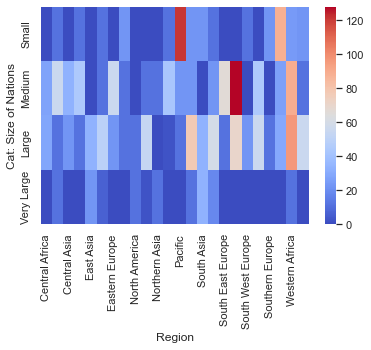

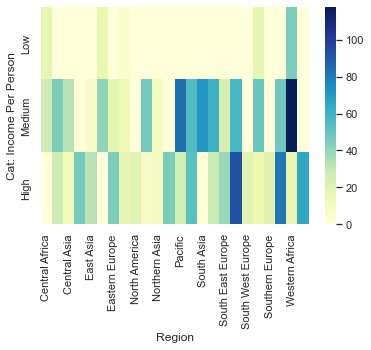

In [221]:
# descriptive columns
for cols in gm_df_10s.columns:
    if isinstance(gm_df_10s[cols].iloc[0], (int, float)):
        print(gm_df_10s[cols].describe)

# Crosstabs
popSize_by_region = pd.crosstab(gm_df_10s['Cat: Size of Nations'], gm_df_10s['Region'])
popSize_by_continent = pd.crosstab(gm_df_10s['Cat: Size of Nations'], gm_df_10s['Continent'])

incomeSize_by_region = pd.crosstab(gm_df_10s['Cat: Income Per Person'], gm_df_10s['Region'])
incomeSize_by_continent = pd.crosstab(gm_df_10s['Cat: Income Per Person'], gm_df_10s['Continent'])

print(popSize_by_continent)
#print(popSize_by_region)
#print(incomeSize_by_continent)
#print(incomeSize_by_region)

# Population Size by Region
sns.set_palette("hls", 8)
ax = popSize_by_continent.plot(kind='bar', stacked=False, rot=0, width = 0.9 )
ax.legend(title='Continent', bbox_to_anchor=(1, 1.02), loc='upper left')
#annotate
for c in ax.containers:
    ax.bar_label(c, label_type='center')

plt.grid(axis='y', linewidth=0.5, color='gray', linestyle='--')
plt.show()

# Income Size by Region
sns.set_palette("hls", 8)
ax = incomeSize_by_continent.plot(kind='bar', stacked=False, rot=0, width = 0.9 )
ax.legend(title='Continent', bbox_to_anchor=(1, 1.02), loc='upper left')
for c in ax.containers:
    ax.bar_label(c, label_type='center')

plt.grid(axis='y', linewidth=0.5, color='gray', linestyle='--')
plt.show()

# Population Size by Continent
sns.heatmap(popSize_by_region, cmap='coolwarm')
plt.show()

# Income Size by Continent
sns.heatmap(incomeSize_by_region, cmap='YlGnBu')
plt.show()

Question 6: Create paired plot of all numerical columns and color code by continents. 


Index(['time', 'co2_emissions_tonnes_per_person', 'gapminder_gini',
       'income_per_person_with_projections', 'inflation_annual_percent',
       'cell_phones_per_100_people', 'gdp_per_capita_yearly_growth',
       'life_expectancy_years', 'aged_15plus_unemployment_rate_percent',
       'sex_ratio_all_age_groups', 'population_total'],
      dtype='object')


<function matplotlib.pyplot.show(close=None, block=None)>

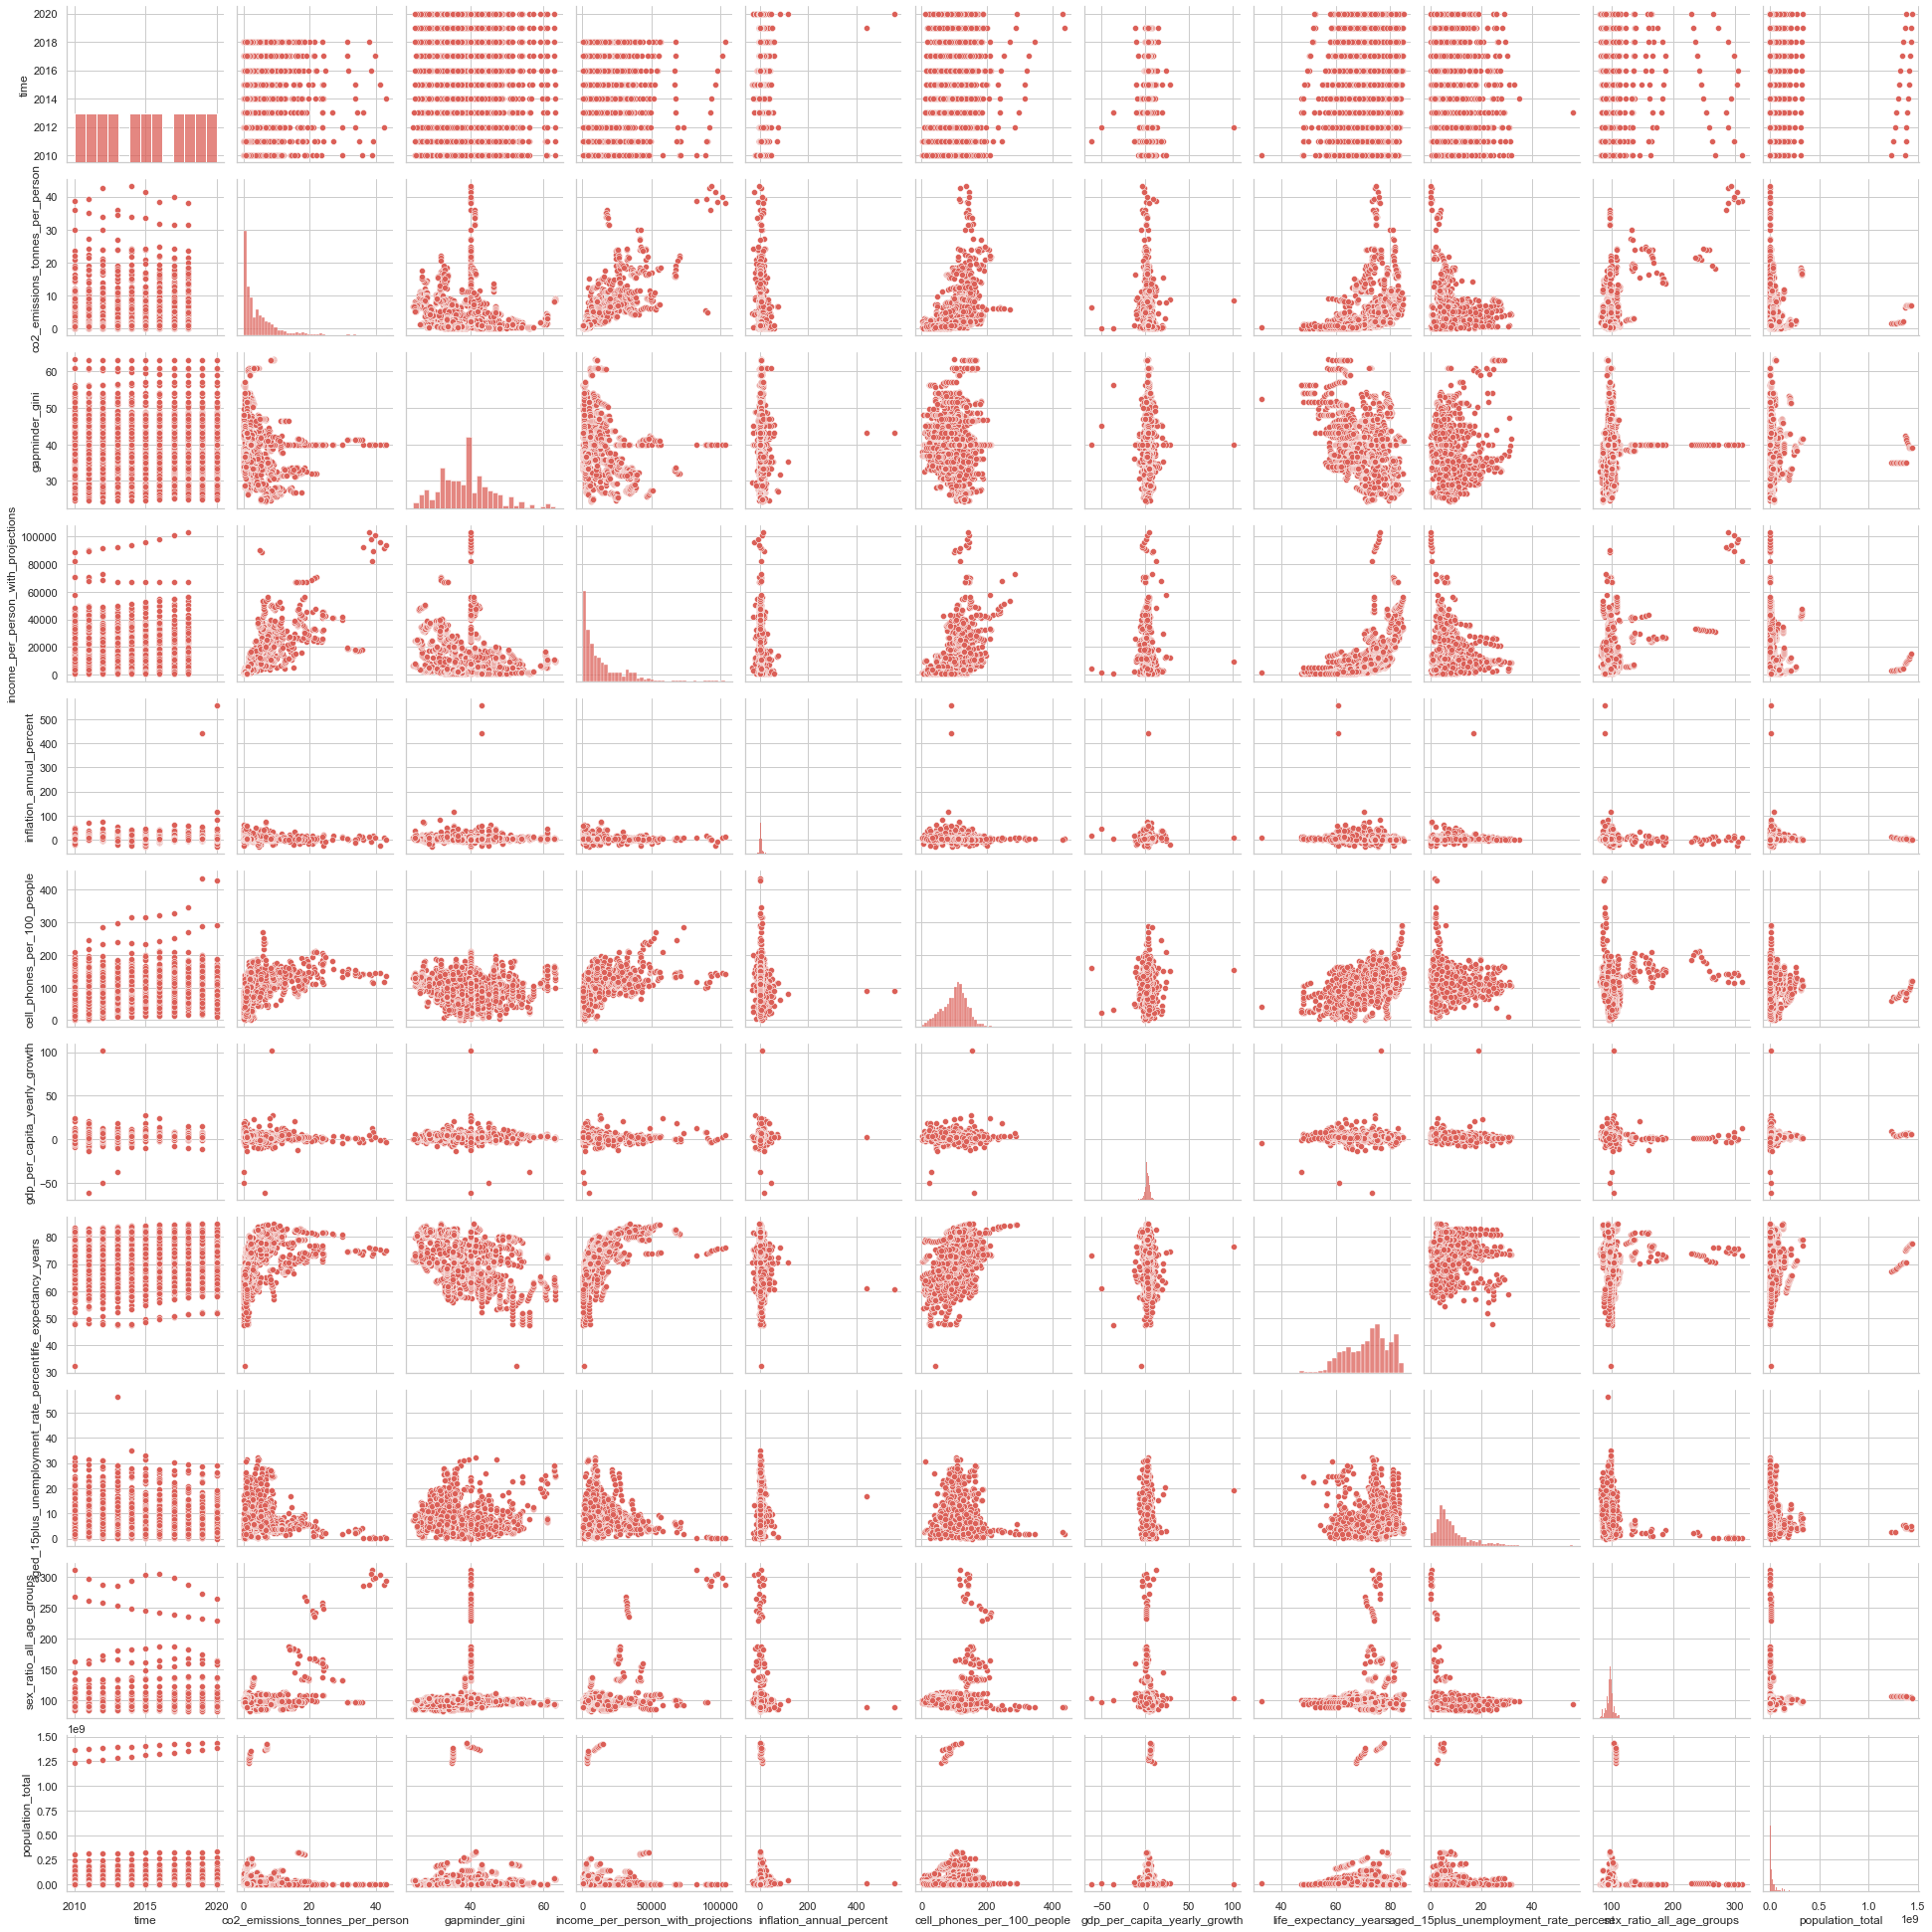

In [222]:
numCols = gm_df.select_dtypes(include=[np.number]).columns
print(numCols)
sns.pairplot(gm_df_10s[numCols])
plt.show

Question 7: Standardize and Normalize (minmax) all numerical columns. Create scatterplots of the original scale with the transformed scale for any three of the numerical columns.


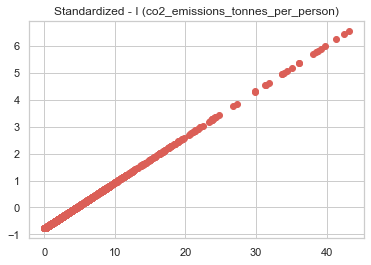

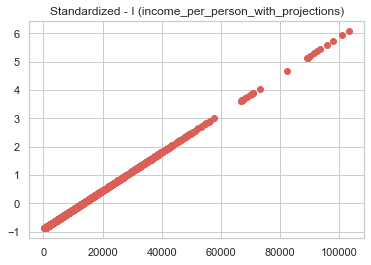

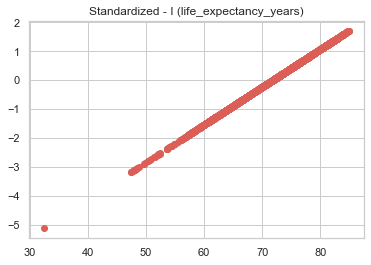

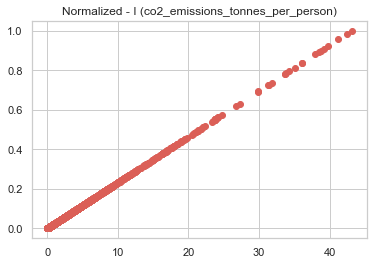

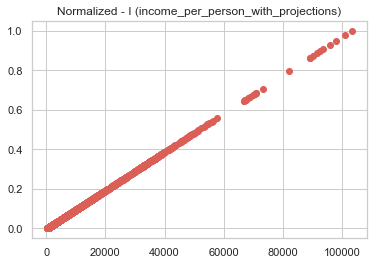

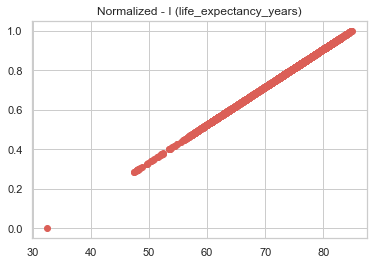

In [223]:
#Cite for inspiration: https://androidkt.com/how-to-normalize-scale-standardize-pandas-dataframe-columns-using-scikit-learn/
standardized = gm_df_10s.copy()
standardized[numCols] = sklearn.preprocessing.StandardScaler().fit_transform(standardized[numCols])

normalized = gm_df_10s.copy()
normalized[numCols] = sklearn.preprocessing.MinMaxScaler().fit_transform(normalized[numCols])

# Scatterplots for 3 colms
emmisions_col = 'co2_emissions_tonnes_per_person'
income_col = 'income_per_person_with_projections'
lifeExpectancy_col = 'life_expectancy_years'

Scatterpolots = [emmisions_col, income_col, lifeExpectancy_col]

for index, i in enumerate(Scatterpolots):
    plt.scatter(gm_df_10s[i], standardized[i])
    plt.title("Standardized - I ({})".format(i))
    plt.show()

for index, j in enumerate(Scatterpolots):
    plt.scatter(gm_df_10s[j], normalized[j])
    plt.title("Normalized - I ({})".format(j))
    plt.show()

Question 8: Run t-tests for the following comparisons:
a.	Mean life expectancy for African nations with European nations
b.	Mean income for Asian nations with African nations. 
c.	[Extra Credit] Identify and eliminate outliers and perform the above tests again. 


In [224]:
# slicing data
african_nats = gm_df_10s[gm_df_10s['Continent'] == 'Africa']
euro_nats = gm_df_10s[gm_df_10s['Continent'] == 'Europe']
asian_nats = gm_df_10s[gm_df_10s['Continent'] == 'Asia']

#print(african_nats.head)
# checking these numbers as a gut check
african_nats_mean = african_nats["life_expectancy_years"].mean()
euro_nats_mean = euro_nats["life_expectancy_years"].mean()
print(african_nats_mean)
print(euro_nats_mean)

#remove missing values
african_nats = african_nats.dropna()
euro_nats = euro_nats.dropna()
asian_nats = asian_nats.dropna()

# Ttest life expectance for African nations with european nations
life_exp_ttest = scipy.stats.ttest_ind(african_nats["life_expectancy_years"], euro_nats["life_expectancy_years"])
print(life_exp_ttest)

if life_exp_ttest.pvalue < 0.05:
    print("The difference in life expectancy is statistically significant")
else:
    print("The difference in life expectancy is NOT statistically significant")

#ttest income
income_ttest = scipy.stats.ttest_ind(african_nats["income_per_person_with_projections"], asian_nats["income_per_person_with_projections"])
if income_ttest.pvalue < 0.05:
    print("The difference in income is statistically significant")
else:
    print("The difference in income is NOT statistically significant")



63.978092691622116
79.2499277108434
Ttest_indResult(statistic=-27.474745808465475, pvalue=2.2907740769527192e-98)
The difference in life expectancy is statistically significant
The difference in income is statistically significant


Question 9: Run chi-sq test to check if the size of a nation is associated with the income per person of the nation. 

In [225]:
# cite: Scipy docs - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html#scipy.stats.chi2_contingency
# is size of a nation associate with income?
ct = pd.crosstab(gm_df_10s["Cat: Size of Nations"], gm_df_10s["Cat: Income Per Person"])
print(ct)
res, pvalue, dof, expected = scipy.stats.chi2_contingency(ct)
if pvalue < 0.05:
    print("The correlation is statistically significant")
else:
    print("The correlation is NOT statistically significant")



Cat: Income Per Person  Low  Medium  High
Cat: Size of Nations                     
Small                     0     171   122
Medium                   55     248   327
Large                    56     366   224
Very Large                0      57    51
The correlation is statistically significant
